<table align="center" width=100%>
    <tr>
        <td width="10%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass-Lab  <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Table of Content

1. **[Chi-Square Test](#chisq)**
2. **[One-way ANOVA](#1way)**

**Import the required libraries**

In [ ]:
# 6. The NY university has opened the post of Astrophysics professor. 
#The total number of applications was 36. To check the authenticity of the applicants a sample of 10 applications was collected, out of which 3 applicants were found to be a fraud. Construct the 95% confidence interval for the population proportion.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
from scipy.stats import ttest_1samp,f_oneway
from scipy.stats import chi2_contingency,chisquare
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm


### Let's begin with some hands-on practice exercises

<a id = "chisq"> </a>
## 1. Chi-Square Test

In [1]:
#df=pd.read_csv('Employee_Attrition.csv')
#df.head()

In [5]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [7]:
df.shape

(1470, 35)

In [11]:
n=1470


Use the data available in the CSV file `Employee_Attrition.csv` for questions 1 to 6.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. A company in Los Angeles has three functional departments - Research and Development, Sales, and Human Resources. The company claims that the percentage of employees in these 3 departments is 55%, 35% and 10% respectively. Check the company's claim using p-value criteria. Consider a 5% level of significance.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
#simple chi square 
chisquare([961,446,63],[0.55*n,0.35*n,0.1*n])
# p value < 0.05 we reject null hypotheis

Power_divergenceResult(statistic=85.88470712960503, pvalue=2.2406437256053955e-19)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. The employees in an IT firm undergo an online assessment survey. The survey reveals that 20% of employees are least satisfied, 18% are fairly satisfied, 30% are moderately satisfied and 32% are highly satisfied with their job. Use a critical value method to test the survey result with 90% confidence.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
df['JobSatisfaction'].value_counts()
chisquare([289,280,442,459],[0.2*n,0.18*n,0.3*n,0.32*n])
# since p value  > 0.1, null hypothesis holds good 

Power_divergenceResult(statistic=1.2598733938019708, pvalue=0.7386828586247451)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. The company claims that in the organization, 68% of employees are there with rare travelling, 20% with frequent travelling and 12% of employees does not need to travel for business. Check if the given data fits with the company's claimed distribution. Use the p-value technique with 99% confidence. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
df['BusinessTravel'].value_counts()
chisquare([1043,277,150],[0.68*n,0.2*n,0.12*n])
# p value > 0.01 hence null hypothesis holds good

Power_divergenceResult(statistic=6.818327330932372, pvalue=0.0330688454314459)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Check whether travelling for work depends upon the job role of an employee. Use p-value criteria to test the dependence with 99% confidence.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
df['JobRole'].value_counts()
# DOF = 9-1 * (3-1) = 16
d=pd.crosstab(df['JobRole'],df['BusinessTravel'])
chi2_contingency(d)
# p value > 0.01 hence null hypothesis holds good
d

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
JobRole,,,
Healthcare Representative,15,26,90
Human Resources,4,10,38
Laboratory Technician,28,51,180
Manager,12,13,77
Manufacturing Director,13,29,103
Research Director,6,12,62
Research Scientist,28,54,210
Sales Executive,39,59,228
Sales Representative,5,23,55


In [27]:
# irrespective of the job role the proportion of the business travel is same

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Is there any relationship between the attrition of an employee and his/her marital status? Use the critical value technique to test the relationship with 95% confidence. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
e=pd.crosstab(df['Attrition'],df['MaritalStatus'])
chi2_contingency(e)
# Attrition rate is not same w.r.t MaritalStatus,Ha holds good 
e

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


In [38]:
33/327,84/673,120/470
# More single martial status employess are leaving comapred to other status

(0.10091743119266056, 0.12481426448736999, 0.2553191489361702)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Check whether travelling for the business depends on the gender of an employee. Use the p-value technique to test the claim with 90% confidence. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
Bs=pd.crosstab(df['BusinessTravel'],df['Gender'])
Bs

Gender,Female,Male
BusinessTravel,,
Non-Travel,49,101
Travel_Frequently,117,160
Travel_Rarely,422,621


In [43]:
chi2_contingency(Bs)
# Null hypotesis holds good(There is no gender biased for business travel)

(4.031372310350092,
 0.13322895625828154,
 2,
 array([[ 60. ,  90. ],
        [110.8, 166.2],
        [417.2, 625.8]]))

<a id = "1way"> </a>
## 2. One-way ANOVA

Use the data available in the CSV file `sales_emp.csv` for questions 7 to 11.

In [45]:
sales=pd.read_csv('sales_emp.csv')
sales.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,36,Travel_Rarely,1218,9,4,Life Sciences,1,27,3,82,...,2,80,0,10,4,3,5,3,0,3
1,39,Travel_Rarely,895,5,3,Technical Degree,1,42,4,56,...,3,80,1,19,6,4,1,0,0,0
2,50,Travel_Rarely,869,3,2,Marketing,1,47,1,86,...,3,80,0,3,2,3,3,2,0,2
3,46,Travel_Rarely,669,9,2,Medical,1,118,3,64,...,4,80,0,9,3,3,9,8,4,7
4,25,Non-Travel,240,5,3,Marketing,1,142,3,46,...,4,80,0,6,1,3,6,4,0,3


In [55]:
sales.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Check whether we can use the given dataset to study the equality of average monthly income of sales executives with a different education background in the company. Use a p-value technique to test at a 5% level of significance.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
sales['EducationField'].value_counts()

Marketing           20
Life Sciences       16
Medical              8
Technical Degree     6
Other                4
Name: EducationField, dtype: int64

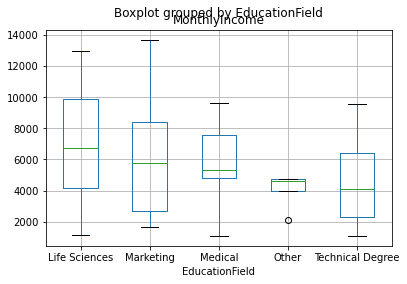

In [52]:
sales.boxplot(column='MonthlyIncome',by='EducationField')
plt.show()

In [56]:
m=ols('MonthlyIncome ~ EducationField',data=sales).fit()
anova_lm(m,type=1)
# the average income is same across all EducationField,hence null hypothesis holds good

,df,sum_sq,mean_sq,F,PR(>F)
EducationField,4.0,4.087768e+07,1.021942e+07,0.954603,0.440787
Residual,49.0,5.245652e+08,1.070541e+07,NaN,NaN


 <table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Use the sales employees' dataset to test whether the average monthly income of sales executives with different education background is equal or not. Use a critical value method with 95% confidence.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

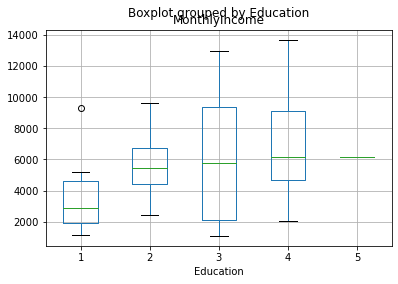

In [58]:
sales.boxplot(column='MonthlyIncome',by='Education')
plt.show()

In [60]:
ed=ols('MonthlyIncome ~ Education',data=sales).fit()
anova_lm(ed,type=1)
# income varies based on education (null hypothesis is rejected )

,df,sum_sq,mean_sq,F,PR(>F)
Education,1.0,4.111707e+07,4.111707e+07,4.077785,0.048619
Residual,52.0,5.243258e+08,1.008319e+07,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Can we use the given data of sales executives to check the equality of the average daily rate for different types of business travellers? Use a p-value technique to test at a 1% level of significance.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

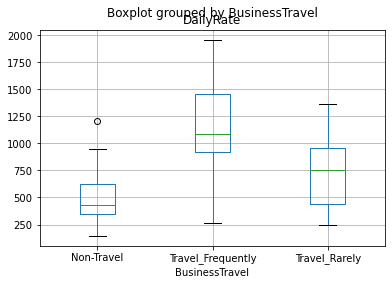

In [63]:
sales.columns
sales.boxplot(column='DailyRate',by='BusinessTravel')
plt.show()

In [66]:
bs=ols('DailyRate ~ BusinessTravel',data=sales).fit()
anova_lm(bs,type=1)
# there is variation in daily rate based on business travelers (null hypothesis is rejected )

,df,sum_sq,mean_sq,F,PR(>F)
BusinessTravel,2.0,3.755400e+06,1.877700e+06,15.81576,0.000005
Residual,51.0,6.054890e+06,1.187233e+05,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Use the parametric test to check the equality of the average daily rate for all the types of business travelling. Use a p-value technique to test the data with 99% confidence.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [75]:
# parametric test --> use F_1way
sales.head()
x=sales.groupby('BusinessTravel')
g1=x.get_group('Travel_Rarely')
g2=x.get_group('Non-Travel')
g3=x.get_group('Travel_Frequently')


In [77]:
f_oneway(g1['DailyRate'],g2['DailyRate'],g3['DailyRate'])
# Null Hypothesis is rejected because p value < 0.01

F_onewayResult(statistic=15.815759872412409, pvalue=4.527131533131016e-06)

In [71]:
sales['BusinessTravel'].unique()

array(['Travel_Rarely', 'Non-Travel', 'Travel_Frequently'], dtype=object)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the types of business travel for which the average daily rate is different. Use a 1% level of significance.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [78]:
# Daily rate is high for people who travel frequently and least for non travellers 